In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Analyse approfondie du jeu de données

In [5]:
from datasets import load_dataset

ds = load_dataset("DBQ/Chanel.Product.prices.Germany")
df = ds["train"].to_pandas()
df.columns

c:\Users\victor\Documents\ECOLE\5A\T1\BIG DATA\PROJET\PROJET 2\chanel-recommender\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since DBQ/Chanel.Product.prices.Germany couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\victor\.cache\huggingface\datasets\DBQ___chanel.product.prices.germany\default\0.0.0\0b6281235ae4f5debd6cb188b3c3dbbb1f787c6d (last modified on Wed Nov 26 18:00:19 2025).


Index(['website_name', 'competence_date', 'country_code', 'currency_code',
       'brand', 'category1_code', 'category2_code', 'category3_code',
       'product_code', 'title', 'itemurl', 'imageurl', 'full_price', 'price',
       'full_price_eur', 'price_eur', 'flg_discount'],
      dtype='object')

# 1.1. Exploration initiale 

### 1.1.1. Analyse des colonnes du dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   website_name     1428 non-null   object 
 1   competence_date  1428 non-null   object 
 2   country_code     1428 non-null   object 
 3   currency_code    1428 non-null   object 
 4   brand            1428 non-null   object 
 5   category1_code   1428 non-null   object 
 6   category2_code   1428 non-null   object 
 7   category3_code   1428 non-null   object 
 8   product_code     1428 non-null   object 
 9   title            1428 non-null   object 
 10  itemurl          1428 non-null   object 
 11  imageurl         1428 non-null   object 
 12  full_price       1428 non-null   float64
 13  price            1428 non-null   float64
 14  full_price_eur   1428 non-null   float64
 15  price_eur        1428 non-null   float64
 16  flg_discount     1428 non-null   int64  
dtypes: float64(4),

In [7]:
df.tail()

,website_name,competence_date,country_code,currency_code,brand,category1_code,category2_code,category3_code,product_code,title,itemurl,imageurl,full_price,price,full_price_eur,price_eur,flg_discount
1423,Chanel,2023-11-17,DEU,EUR,CHANEL,MAKEUP,BRUSHES AND ACCESSORIES,N.A.,PP138848,PRÄZISER PUDER-PINSEL,https://www.chanel.com/de/make-up/p/138848/pin...,https://res.cloudinary.com/dwayrkp5z/image/fet...,50.0,50.0,50.0,50.0,0
1424,Chanel,2023-11-17,DEU,EUR,CHANEL,SKINCARE,MOISTURIZERS,N.A.,PP140360,REICHHALTIGKEIT - SCHUTZ - AUFHELLENDE WIRKUNG,https://www.chanel.com/de/hautpflege/p/140360/...,https://res.cloudinary.com/dwayrkp5z/image/fet...,49.0,49.0,49.0,49.0,0
1425,Chanel,2023-11-17,DEU,EUR,CHANEL,SKINCARE,TONERS & LOTIONS,N.A.,PP140650,POLSTERT AUF – GLEICHT AUS – SCHENKT STRAHLKRAFT,https://www.chanel.com/de/hautpflege/p/140650/...,https://res.cloudinary.com/dwayrkp5z/image/fet...,92.0,92.0,92.0,92.0,0
1426,Chanel,2023-11-17,DEU,EUR,CHANEL,JEWELRY,N°5,N.A.,PJ12428,18 Karat BEIGEGOLD Diamanten,https://www.chanel.com/de/schmuck/p/J12428/ext...,https://res.cloudinary.com/dwayrkp5z/image/fet...,3550.0,3550.0,3550.0,3550.0,0
1427,Chanel,2023-11-17,DEU,EUR,CHANEL,FASHION,HANDBAGS,N.A.,PAS4280B13693,Lammfell & silberfarbenes Metall Weiß,https://www.chanel.com/de/mode/p/AS4280B136931...,https://res.cloudinary.com/dwayrkp5z/image/fet...,5400.0,5400.0,5400.0,5400.0,0


##### 1.1.1.1. Colonne category2_code

In [8]:
df['category2_code'].value_counts()

category2_code
READY-TO-WEAR                  243
COSTUME JEWELRY                127
SUNGLASSES                      99
WOMEN                           88
WATCHES                         87
MEN                             72
HANDBAGS                        61
COCO CRUSH                      54
SHOES                           42
FACE                            41
EYEGLASSES                      40
SMALL LEATHER GOODS             38
BATH AND BODY                   36
EYES                            35
MOISTURIZERS                    35
RINGS                           35
NECKLACES                       30
BRUSHES AND ACCESSORIES         26
EARRINGS                        26
BLUE LIGHT GLASSES              24
LIPS                            21
N°5                             15
EXCEPTIONAL PIECES              11
CLEANSERS & MAKEUP REMOVERS     11
TONERS & LOTIONS                11
BELTS                           10
BRACELETS                        9
OILS                             9
HEADW

In [9]:
# Nombre de catégorie unique
len(df['category2_code'].unique())

51

In [10]:
# Pourcentage de chaque catégorie dans le dataset. Reviens à diviser le nombre d'occurence de la catégorie par 1428.
df['category2_code'].value_counts(normalize=True) * 100

category2_code
READY-TO-WEAR                  17.016807
COSTUME JEWELRY                 8.893557
SUNGLASSES                      6.932773
WOMEN                           6.162465
WATCHES                         6.092437
MEN                             5.042017
HANDBAGS                        4.271709
COCO CRUSH                      3.781513
SHOES                           2.941176
FACE                            2.871148
EYEGLASSES                      2.801120
SMALL LEATHER GOODS             2.661064
BATH AND BODY                   2.521008
EYES                            2.450980
MOISTURIZERS                    2.450980
RINGS                           2.450980
NECKLACES                       2.100840
BRUSHES AND ACCESSORIES         1.820728
EARRINGS                        1.820728
BLUE LIGHT GLASSES              1.680672
LIPS                            1.470588
N°5                             1.050420
EXCEPTIONAL PIECES              0.770308
CLEANSERS & MAKEUP REMOVERS     0.770308
T

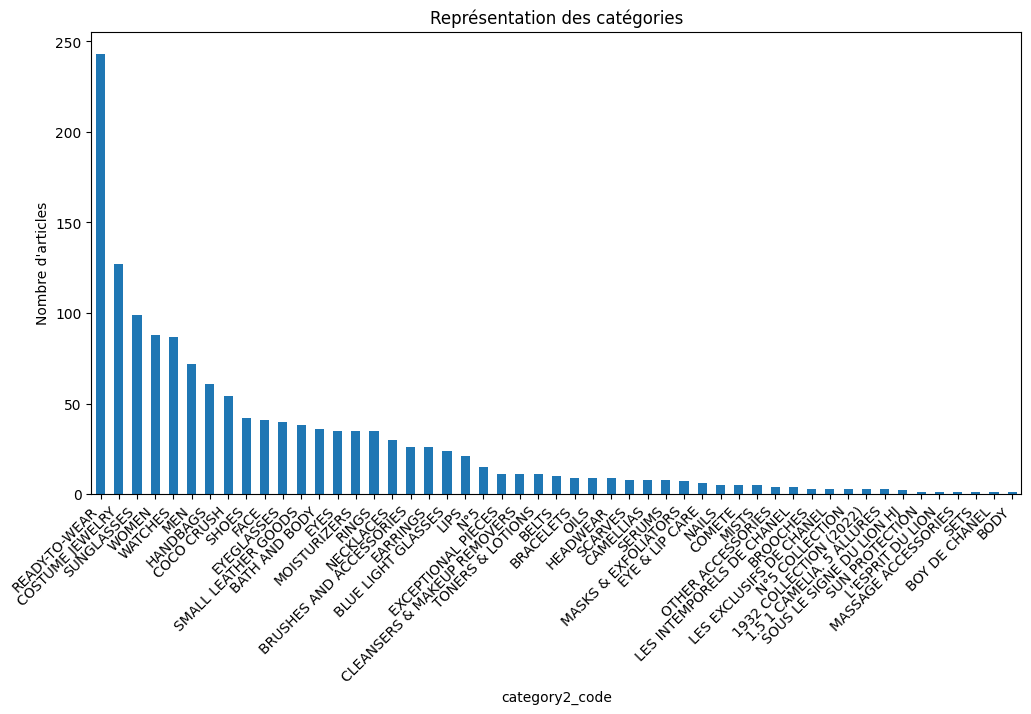

In [11]:
# Histogramme de représentation des catégories
plt.figure(figsize=(12, 6))
df['category2_code'].value_counts().plot(kind='bar')
plt.title("Représentation des catégories")
plt.ylabel("Nombre d'articles")
plt.xticks(rotation=45, ha='right')
plt.show()


La colonne category2_code représente la catégorie fine de chaque produit Chanel. Le dataset contient 51 catégories distinctes, mais leur distribution est fortement déséquilibrée. Certaines catégories dominent largement, comme READY-TO-WEAR (17 %), COSTUME JEWELRY (8.9 %) ou SUNGLASSES (6.9 %), tandis qu’une majorité de catégories rares ne représentent chacune que moins de 1 % du dataset.
Ce déséquilibre crée un biais important, qui devra être pris en compte lors de l’entraînement du modèle de classification visuelle (Partie 2), puisque les classes minoritaires ne disposent pas d’assez d’exemples pour permettre un apprentissage robuste.

### 1.1.1.2. Colonne Titre

In [12]:
# Affichage des 10 premiers titres
df['title'].head(10)

0    Tweed & goldfarbenes Metall  Schwarz  Rosa & B...
1                                                 n.a.
2                                              Schwarz
3             Silberfarben. Gläser: Braun  Mit Verlauf
4               Blau & Rosa. Gläser: Grau  Mit Verlauf
5                   Schwarz. Gläser: Grau  Mit Verlauf
6                            Rosa & Weiß. Gläser: Rosa
7                       Silberfarben. Gläser: Bordeaux
8            18 Karat Weißgold  Diamanten  Zuchtperlen
9                        Steppmotiv  18 Karat Gelbgold
Name: title, dtype: object

In [13]:
# Verification des titres absents.
df['title'].isna().sum()

np.int64(0)

In [14]:
# Verification des doublons.
df['title'].duplicated().sum()

np.int64(604)

In [15]:
# Nombre de titres uniques.
df['title'].value_counts()

title
18 Karat Weißgold  Diamanten                        68
n.a.                                                46
Schwarz. Gläser: Grau  Mit Verlauf                  21
EAU DE PARFUM ZERSTÄUBER                            18
LES EXCLUSIFS DE CHANEL - EAU DE PARFUM             17
                                                    ..
Kaschmir & Mohair  Beige  Schwarz & Korallenrosa     1
TASCHENSPIEGEL MIT ZWEI FACETTEN                     1
PRÄZISER PUDER-PINSEL                                1
REICHHALTIGKEIT - SCHUTZ - AUFHELLENDE WIRKUNG       1
PARFUM ZERSTÄUBER                                    1
Name: count, Length: 824, dtype: int64

In [16]:
# Affichage des titres dupliqués. 
df[df['title'].duplicated()]['title'].unique()

array(['Schwarz', 'Schwarz. Gläser: Grau  Mit Verlauf',
       'Metall  Lammleder & Strass  Goldfarben  Schwarz & Kristall',
       'Schwarz. Gläser: Transparent', 'n.a.',
       'Metall  Glasperlen & Strass  Goldfarben  Blau & Schwarz',
       'Metall  Glasperlen & Strass  Silberfarben  Schwarz & Kristall',
       '18\xa0Karat Rotgold  Diamanten',
       'Glänzendes Kalbsleder & goldfarbenes Metall  Schwarz',
       '18 Karat Weißgold  Diamanten',
       '18 Karat Weißgold und Gelbgold  Diamanten',
       '18\xa0Karat Gelbgold  Diamanten',
       'Metall & Strass  Silberfarben & Kristall',
       'Steppmotiv  18 Karat Weißgold  Diamanten',
       'Metall & Harz  Goldfarben & Braun',
       'Steppmotiv  18 Karat Gelbgold  Diamanten',
       '18 Karat BEIGEGOLD  Diamanten', 'Steppmotiv  18 Karat BEIGEGOLD',
       'Steppmotiv  18 Karat Gelbgold',
       'Mittelgroßes Modell  18 Karat Weißgold  Diamanten',
       'Metall  Harz & Strass  Goldfarben  Gelb & Kristall',
       'Großes Modell

La colonne title contient une courte description textuelle en allemand de chaque produit Chanel. L’analyse montre qu’il n’existe aucune valeur manquante, ce qui garantit une bonne qualité de données. En revanche, on observe 604 doublons sur 1428 titres, soit environ 42 % du dataset. Cela s’explique par la nature des titres, souvent très courts et génériques (ex. couleurs, matériaux, finitions), qui sont partagés par plusieurs variantes d’un même produit.

##### 1.1.1.3. Colonne image

Avant de run la suite, exécuter `src\script\download_images.py`

In [17]:
import os

image_dir = "../data/images"

# Récupère seulement les noms de fichiers .jpg
files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]

# Convertit '123.jpg' → 123
available_ids = sorted(int(f.split(".")[0]) for f in files)

# Tous les IDs attendus
expected_ids = set(range(1428))

# IDs présents
present = set(available_ids)

# IDs manquants
missing = sorted(list(expected_ids - present))

print("Nombre d'images présentes :", len(present))
print("Nombre d'images manquantes :", len(missing))
print("IDs manquants :", missing)


Nombre d'images présentes : 899
Nombre d'images manquantes : 529
IDs manquants : [1, 8, 9, 10, 18, 19, 23, 29, 45, 57, 58, 61, 70, 72, 74, 75, 77, 79, 83, 87, 88, 90, 92, 99, 102, 104, 105, 106, 107, 108, 112, 113, 114, 115, 116, 117, 122, 123, 124, 125, 126, 127, 128, 133, 134, 135, 136, 137, 138, 139, 140, 141, 147, 148, 149, 150, 154, 155, 156, 157, 158, 159, 160, 165, 169, 173, 175, 182, 183, 185, 189, 190, 191, 197, 198, 200, 204, 205, 206, 209, 211, 212, 213, 214, 216, 217, 218, 241, 242, 243, 244, 245, 248, 249, 250, 258, 259, 261, 262, 263, 269, 270, 272, 275, 278, 283, 289, 290, 293, 294, 299, 306, 307, 310, 311, 313, 315, 316, 317, 330, 331, 332, 333, 334, 335, 337, 338, 339, 340, 341, 345, 346, 350, 354, 355, 360, 372, 385, 389, 390, 391, 392, 393, 395, 396, 399, 410, 411, 412, 415, 416, 417, 418, 420, 421, 425, 427, 428, 430, 431, 435, 436, 437, 438, 439, 440, 444, 445, 446, 453, 459, 461, 462, 464, 465, 467, 473, 477, 478, 479, 480, 481, 485, 486, 488, 490, 493, 494, 500, 

In [18]:
import os

image_dir = "../data/images"

files = sorted([
    f for f in os.listdir(image_dir)
    if f.endswith(".jpg") 
])

print("Nombre d'images :", len(files))
files[:10]


Nombre d'images : 899


['0.jpg',
 '100.jpg',
 '1001.jpg',
 '1002.jpg',
 '1003.jpg',
 '1004.jpg',
 '1005.jpg',
 '1006.jpg',
 '1007.jpg',
 '1008.jpg']

In [19]:
from PIL import Image
import numpy as np

widths = []
heights = []

for f in files:
    img = Image.open(os.path.join(image_dir, f))
    w, h = img.size
    widths.append(w)
    heights.append(h)

widths = np.array(widths)
heights = np.array(heights)

print("Largeur moyenne :", widths.mean())
print("Hauteur moyenne :", heights.mean())
print("Largeur min / max :", widths.min(), "/", widths.max())
print("Hauteur min / max :", heights.min(), "/", heights.max())


Largeur moyenne : 311.02892102335926
Hauteur moyenne : 361.16685205784205
Largeur min / max : 20 / 392
Hauteur min / max : 41 / 400


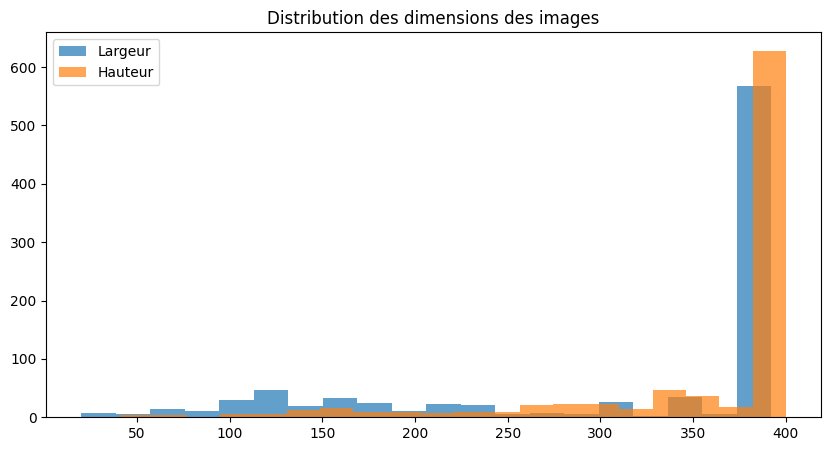

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.hist(widths, bins=20, alpha=0.7, label="Largeur")
plt.hist(heights, bins=20, alpha=0.7, label="Hauteur")
plt.legend()
plt.title("Distribution des dimensions des images")
plt.show()


In [21]:
ratios = widths / heights

print("Ratio moyen :", ratios.mean())
print("Ratio min / max :", ratios.min(), "/", ratios.max())


Ratio moyen : 0.8840647359282059
Ratio min / max : 0.05847953216374269 / 3.4545454545454546


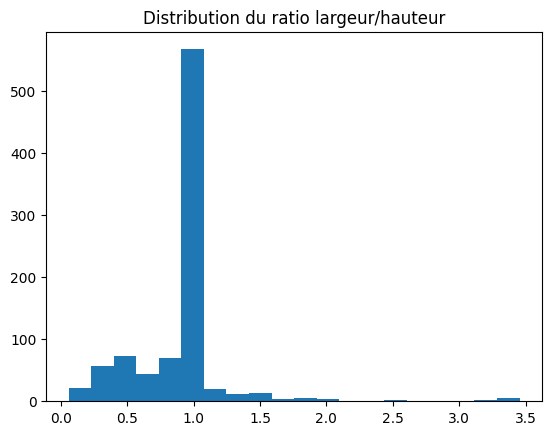

In [22]:
plt.hist(ratios, bins=20)
plt.title("Distribution du ratio largeur/hauteur")
plt.show()


In [23]:
def avg_color(path):
    img = Image.open(path).convert("RGB")
    arr = np.array(img)
    return arr.mean(axis=(0,1))  # [R, G, B]

avg_colors = np.array([
    avg_color(os.path.join(image_dir, f))
    for f in files
])

print("Moyenne R,G,B :", avg_colors.mean(axis=0))


Moyenne R,G,B : [169.62403782 167.78299207 161.43937047]


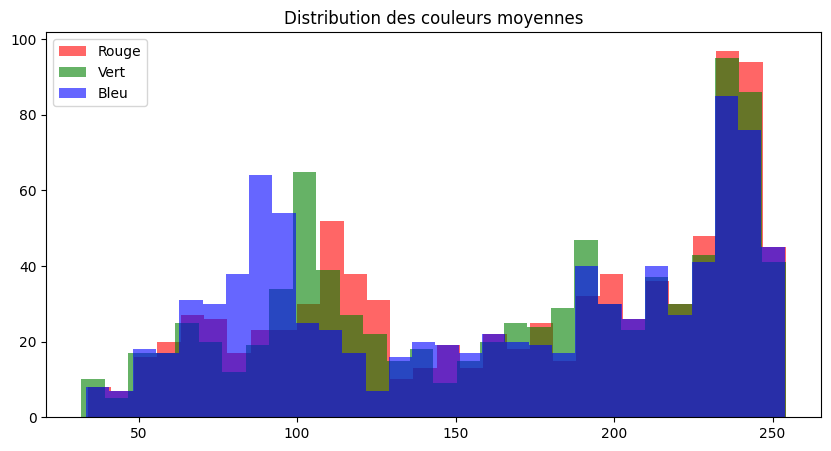

In [24]:
plt.figure(figsize=(10,5))
plt.hist(avg_colors[:,0], bins=30, alpha=0.6, label="Rouge", color='red')
plt.hist(avg_colors[:,1], bins=30, alpha=0.6, label="Vert", color='green')
plt.hist(avg_colors[:,2], bins=30, alpha=0.6, label="Bleu", color = 'blue')
plt.legend()
plt.title("Distribution des couleurs moyennes")
plt.show()


In [25]:
import os
from PIL import Image
from collections import defaultdict, Counter

image_dir = "../data/images"

# Dictionnaire : category2 -> Counter de formats
formats_count_by_cat = defaultdict(Counter)

for idx, row in df.iterrows():
    img_path = os.path.join(image_dir, f"{idx}.jpg")

    if os.path.exists(img_path):
        try:
            img = Image.open(img_path)
            w, h = img.size
            cat = row["category2_code"]
            formats_count_by_cat[cat][(w, h)] += 1
        except:
            pass

# AFFICHAGE LISIBLE
for cat, counter in formats_count_by_cat.items():
    print(f"\n=== {cat} ===")
    total = sum(counter.values())
    print(f"{total} images au total -> {len(counter)} formats uniques")
    for fmt, count in counter.most_common():     # tri décroissant
        print(f"  {fmt} : {count} images")



=== HANDBAGS ===
32 images au total -> 2 formats uniques
  (378, 400) : 27 images
  (341, 400) : 5 images

=== BLUE LIGHT GLASSES ===
20 images au total -> 1 formats uniques
  (378, 400) : 20 images

=== SUNGLASSES ===
90 images au total -> 1 formats uniques
  (378, 400) : 90 images

=== COCO CRUSH ===
6 images au total -> 4 formats uniques
  (139, 41) : 2 images
  (140, 41) : 2 images
  (123, 67) : 1 images
  (239, 211) : 1 images

=== EYEGLASSES ===
35 images au total -> 1 formats uniques
  (378, 400) : 35 images

=== RINGS ===
8 images au total -> 8 formats uniques
  (94, 141) : 1 images
  (114, 131) : 1 images
  (119, 66) : 1 images
  (104, 142) : 1 images
  (44, 128) : 1 images
  (176, 147) : 1 images
  (77, 132) : 1 images
  (108, 140) : 1 images

=== BRACELETS ===
3 images au total -> 3 formats uniques
  (154, 268) : 1 images
  (234, 72) : 1 images
  (228, 66) : 1 images

=== NECKLACES ===
3 images au total -> 3 formats uniques
  (176, 328) : 1 images
  (170, 327) : 1 images
  

In [26]:
df['category3_code'].value_counts()

category3_code
N.A.    1428
Name: count, dtype: int64

Les catégories Mode (HANDBAGS, READY-TO-WEAR, SUNGLASSES, EYEGLASSES, SHOES…) présentent une homogénéité remarquable :
plus de 95% des images sont au format quasi carré (≈ 378×400 ou 389×400).
Ces visuels proviennent du pipeline e-commerce principal de Chanel et sont parfaitement adaptés à l’extraction d’embeddings CNN.

Les catégories Beauté, Soins, Maquillage (FACE, BATH AND BODY, EYES, LIPS…) sont extrêmement hétérogènes :
certaines catégories comptent plus de formats uniques que d’images (ex : WOMEN, EYES, BRUSHES AND ACCESSORIES).
Les résolutions sont souvent faibles (< 150 px), avec des ratios très variables, ce qui complique l’utilisation de CNN.

Les catégories Bijoux (RINGS, NECKLACES, EARRINGS…) présentent de nombreux formats verticaux, souvent de petite taille, correspondant à des miniatures ou à des images issues d’autres pipelines du site Chanel.